In [1]:
import matplotlib.pyplot as plt
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()

from plotly import graph_objects as go
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
pd.options.display.max_colwidth = 1000

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a.m.ramachandran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
test_df = pd.read_csv('Corona_NLP_test.csv', encoding='latin1')

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [34]:
train_df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


## Missing Values 

In [27]:
# check for missing values
print(train_df.isnull().sum())

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


In [29]:
# Analyze missing values in Location against each sentiment
missing_values = train_df.groupby('Sentiment')['Location'].apply(lambda x: x.isnull().sum())
print(missing_values)

Sentiment
Extremely Negative    1232
Extremely Positive    1351
Negative              2154
Neutral               1541
Positive              2312
Name: Location, dtype: int64


In [30]:
train_df.groupby('Sentiment')['Location'].value_counts()

Sentiment           Location              
Extremely Negative  London, England           81
                    London                    74
                    United States             64
                    Washington, DC            52
                    United Kingdom            47
                                              ..
Positive            Arlington, Virginia        1
                    Around the Globe           1
                    Pining for the Fijords     1
                    Arusha, Tanzania           1
                    Ã  l'Ã©chelle mondiale     1
Name: count, Length: 16755, dtype: int64

## Further exploration ON Location in the file ===> Exploration on Location.ipynb

In [3]:
df = train_df.copy()
df = df[['OriginalTweet', 'Sentiment']]

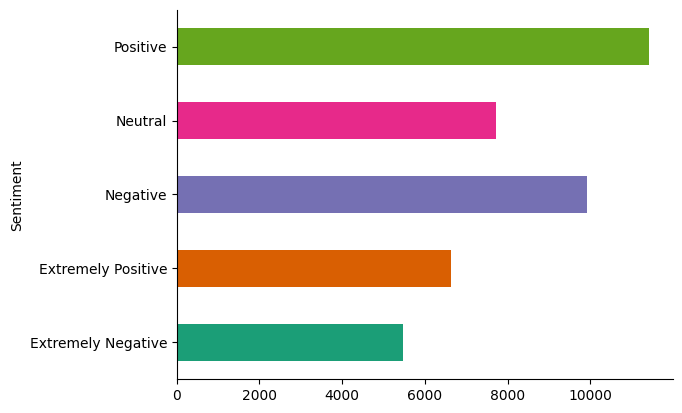

In [4]:
df.groupby('Sentiment').size().plot(kind='barh', color = sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'Relative Sentiment Distribution'}, ylabel='count'>

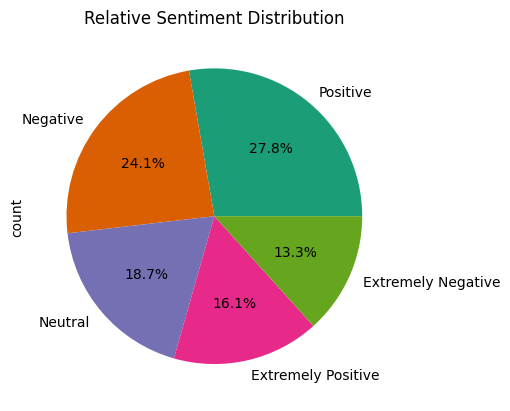

In [5]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = sns.palettes.mpl_palette('Dark2'), title="Relative Sentiment Distribution")

#### The count of Positive sentiment is the highest, followed by Negative and Neutral sentiments. However, the data seems almost balanced. 
#### Generally, Data is considered imbalanced and can affect the model when  there's like 80% and 20% OR 70% and 30% RATIO , but here there's not too much difference.

<Axes: title={'center': 'Length of Tweets'}, ylabel='Frequency'>

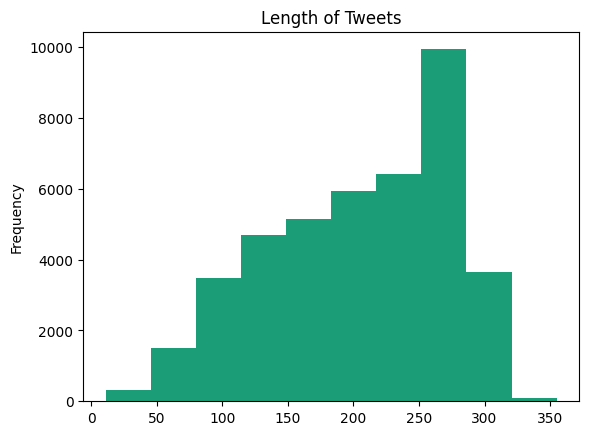

In [6]:
df['OriginalTweet'].str.len().plot(kind='hist', color = sns.palettes.mpl_palette('Dark2')[0], title='Length of Tweets')

#####   The length of the tweets is mostly between 100 and 250 characters. Most of the tweets have a length between 250 and 300 characters.

<Axes: title={'center': 'Number of Words in Tweets'}, ylabel='Frequency'>

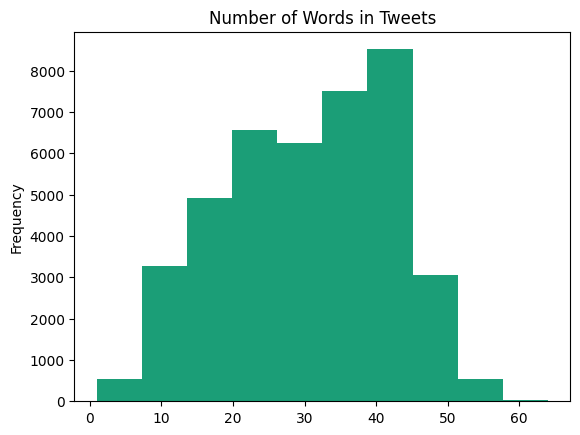

In [8]:
df['OriginalTweet'].str.split().map(lambda x: len(x)).plot(kind='hist', color = sns.palettes.mpl_palette('Dark2')[0], title='Number of Words in Tweets')

#### Most frequent tweets have words between 40 to 45

In [10]:
from wordcloud import WordCloud

In [13]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black', random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = text.strip()
    return text

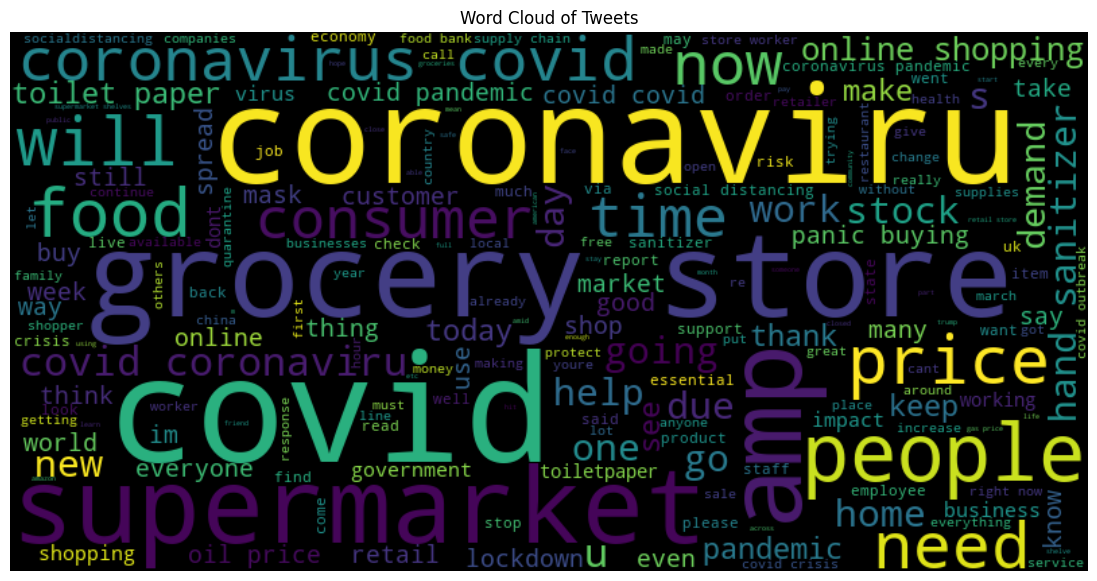

In [14]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_text)
plot_wordcloud(' '.join(df['OriginalTweet']), 'Word Cloud of Tweets')

### The word cloud after cleaning the text shows that the most common words are coronavirus, covid, people, grocery , store , food and supermarket, which is  quite expected

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
eng_stopwords_list = list(eng_stopwords)
cv = CountVectorizer(stop_words=eng_stopwords_list)

In [18]:
cv.fit(df['OriginalTweet'])

CountVectorizer(stop_words=['or', 'it', 'with', 'yourselves', 'that', 'wouldn',
                            'they', 'ourselves', 'nor', 'as', 'all', 'hadn',
                            'once', 'did', 'out', 'couldn', "won't", 'i',
                            'through', 'be', 'very', 'shan', 'here', 'when',
                            "should've", 'over', 'down', 'her', 'too', 'not', ...])

In [19]:
word_freq = cv.transform(df['OriginalTweet'])

In [20]:
word_freq = word_freq.toarray().sum(axis=0)

In [22]:
word_freq_df = pd.DataFrame({'word': cv.get_feature_names_out(), 'freq': word_freq})
word_freq_df.sort_values('freq', ascending=False).head(10)

,word,freq
11132,covid,21797
10593,coronavirus,18019
39402,prices,7908
18766,food,7052
49000,supermarket,7000
48334,store,6789
21443,grocery,6239
37626,people,5495
1791,amp,4958
9970,consumer,4469


<Axes: ylabel='word'>

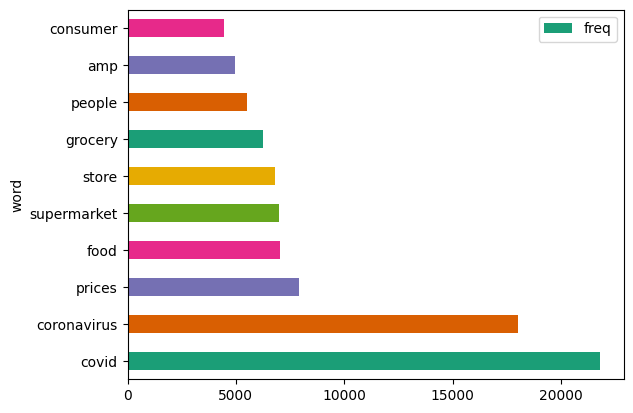

In [23]:
word_freq_df.sort_values('freq', ascending=False).head(10).plot(x='word', y='freq', kind='barh', color = sns.palettes.mpl_palette('Dark2'))

### The most common words are coronavirus, covid, prices, food, supermarket. This is quite expected as the tweets are about the coronavirus pandemic